In [1]:
import numpy as np
import matplotlib.pyplot as plt
import variance_solvers
import equations
import solvers

%matplotlib inline

**Grid refinement**

**Variances**

In [2]:
eq = lambda L_x, L_y: equations.equation_2(L_x, L_y)

In [3]:
split_it = []
stripes_it = []
thick_it = []
BP_it = []
BP_it_p = []
N = []
for J in [3, 4, 5, 6]:
    h = 1/(1 + 2**J)
    A, b, exact = equations.construct_matrix(eq, 'Dirichlet', 1, 1, 2**J, 2**J)
    A = A.toarray()
    
    _, E = variance_solvers.split_BP_solver(A, b, tol=h**2, write=True)
    _, EE = variance_solvers.stripes_BP_solver(A, b, h**2, write=True)
    _, EEE = variance_solvers.thick_stripes_BP_solver(A, b, h**2, write=True)
    _, EEEE = variance_solvers.GaBP(A, b, tol=h**2, write=True)
    _, EEEE = variance_solvers.GaBP(A, b, tol=h**2, type='Parallel', write=True)
    split_it.append(len(E))
    stripes_it.append(len(EE))
    thick_it.append(len(EEE))
    BP_it.append(len(EEEE))
    BP_it_p.append(len(EEEE))
    N.append(2**J)

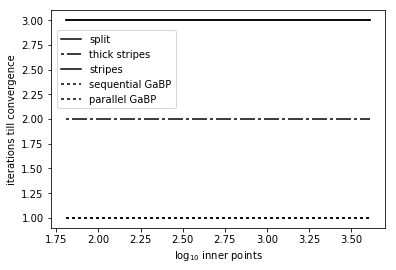

In [4]:
plt.plot(2*np.log10(N), split_it, color='black', label=f'split')
plt.plot(2*np.log10(N), thick_it, dashes=[2, 2, 10, 2], color='black', label=f'thick stripes')
plt.plot(2*np.log10(N), stripes_it, color='black', label=f'stripes')
plt.plot(2*np.log10(N), BP_it, dashes=[2, 2, 2, 2], color='black', label=f'sequential GaBP')
plt.plot(2*np.log10(N), BP_it_p, dashes=[2, 2, 2, 2], color='black', label=f'parallel GaBP')
plt.legend(loc = (0.02, 0.55))
#plt.grid(1)
plt.ylabel('iterations till convergence')
plt.xlabel('$\\log_{10}$ inner points');
plt.savefig('variance_vs_grid_points.eps', format='eps', pad_inches=0.01)

In [5]:
split_it = []
stripes_it = []
thick_it = []
BP_it = []
BP_it_p = []
N = []
for J in [3, 4, 5, 6, 7]:
    h = 1/(1 + 2**J)
    A, b, exact = equations.construct_matrix(eq, 'Dirichlet', 1, 1, 2**J, 2**J)
    A = A.toarray()
    
    exact = np.diag(np.linalg.inv(A))
    
    #s1, E = split_BP_solver(A, b, tol=h**2, write=True)
    s1, _ = variance_solvers.stripes_BP_solver(A, b, h**2, write=True)
    s2, _ = variance_solvers.thick_stripes_BP_solver(A, b, h**2, write=True)
    s3, _ = variance_solvers.GaBP(A, b, tol=h**2, write=True)
    s4, _ = variance_solvers.GaBP(A, b, tol=h**2, type='Parallel', write=True)
    
    EE = np.linalg.norm(s1-exact, ord=np.inf)
    EEE = np.linalg.norm(s2-exact, ord=np.inf)
    EEEE = np.linalg.norm(s3-exact, ord=np.inf)
    EEEEE = np.linalg.norm(s4-exact, ord=np.inf)
    #split_it.append(len(E))
    stripes_it.append(EE)
    thick_it.append(EEE)
    BP_it.append(EEEE)
    BP_it_p.append(EEEEE)
    N.append(h)

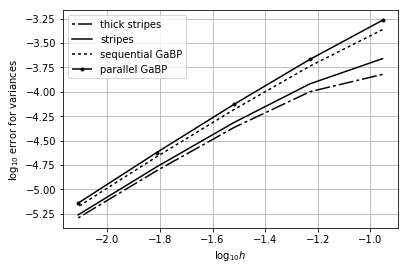

In [6]:
plt.plot(np.log10(N), np.log10(thick_it), dashes=[2, 2, 10, 2], color='black', label=f'thick stripes')
plt.plot(np.log10(N), np.log10(stripes_it), color='black', label=f'stripes')
plt.plot(np.log10(N), np.log10(BP_it), dashes=[2, 2, 2, 2], color='black', label=f'sequential GaBP')
plt.plot(np.log10(N), np.log10(BP_it_p), '.', dashes=[2, 0, 2, 0], color='black', label=f'parallel GaBP')
plt.legend()
plt.grid(1)
plt.ylabel('$\\log_{10}$ error for variances')
plt.xlabel('$\\log_{10} h$');
plt.savefig('variance_convergence_grid.eps', format='eps', pad_inches=0.01)

**The whole scheme**

In [7]:
eq = lambda L_x, L_y: equations.equation_2(L_x, L_y)

In [8]:
split_it = []
stripes_it = []
thick_it = []
BP_it = []
BP_it_p = []
N = []
for J in [2, 3, 4, 5]:
    h = 1/(1 + 2**J)
    A, b, exact = equations.construct_matrix(eq, 'Dirichlet', 1, 1, 2**J, 2**J)
    A = A.toarray()
    
    _, E = solvers.split_BP_solver(A, b, tol=h**2, write=True)
    _, EE = solvers.stripes_BP_solver(A, b, h**2, write=True)
    _, EEE = solvers.thick_stripes_BP_solver(A, b, h**2, write=True)
    _, EEEE = solvers.GaBP(A, b, tol=h**2, write=True)
    _, EEEEE = solvers.GaBP(A, b, tol=h**2, type='Parallel', write=True)
    
    split_it.append(len(E))
    stripes_it.append(len(EE))
    thick_it.append(len(EEE))
    BP_it.append(len(EEEE))
    BP_it_p.append(len(EEEEE))
    N.append(2**J)

In [9]:
AL = []
for a, name in zip([np.log10(split_it), np.log10(thick_it), np.log10(stripes_it), np.log10(BP_it), np.log10(BP_it_p)], ['split', 'thick stripes', 'stripes', 'sequential GaBP', 'parallel GaBP']):
    alpha = np.polyfit(2*np.log10(N), a, deg=1)[0]
    AL.append(alpha)
    print(f'Tangent coefficient for {name} scheme is {alpha:1.4}')

Tangent coefficient for split scheme is 0.3199
Tangent coefficient for thick stripes scheme is 0.6483
Tangent coefficient for stripes scheme is 0.8361
Tangent coefficient for sequential GaBP scheme is 0.8637
Tangent coefficient for parallel GaBP scheme is 0.9097


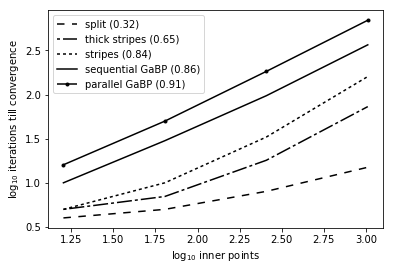

In [10]:
plt.plot(2*np.log10(N), np.log10(split_it), dashes=[5, 5, 5, 5], color='black', label=f'split ({AL[0]:1.2})')
plt.plot(2*np.log10(N), np.log10(thick_it), dashes=[2, 2, 10, 2], color='black', label=f'thick stripes ({AL[1]:1.2})')
plt.plot(2*np.log10(N), np.log10(stripes_it), dashes=[2, 2, 2, 2], color='black', label=f'stripes ({AL[2]:1.2})')
plt.plot(2*np.log10(N), np.log10(BP_it), color='black', label=f'sequential GaBP ({AL[3]:1.2})')
plt.plot(2*np.log10(N), np.log10(BP_it_p), '.', dashes=[2, 0, 2, 0], color='black', label=f'parallel GaBP ({AL[4]:1.2})')
plt.legend()
#plt.grid(1)
plt.ylabel('$\\log_{10}$ iterations till convergence')
plt.xlabel('$\\log_{10}$ inner points');
plt.savefig('Full_convergence_vs_grid_points_.eps', format='eps', pad_inches=0.01)

In [11]:
split_it = []
stripes_it = []
thick_it = []
BP_it = []
BP_it_p = []
N = []
for J in [2, 3, 4, 5]:
    h = 1/(1 + 2**J)
    A, b, exact = equations.construct_matrix(eq, 'Dirichlet', 1, 1, 2**J, 2**J)
    A = A.toarray()
    
    s1, _ = solvers.split_BP_solver(A, b, tol=h**2, write=True)
    s2, _ = solvers.stripes_BP_solver(A, b, h**2, write=True)
    s3, _ = solvers.thick_stripes_BP_solver(A, b, h**2, write=True)
    s4, _ = solvers.GaBP(A, b, tol=h**2, write=True)
    s5, _ = solvers.GaBP(A, b, type='Parallel', tol=h**2, write=True)
    
    E = np.linalg.norm(s1 - exact, ord=np.inf)
    EE = np.linalg.norm(s2 - exact, ord=np.inf)
    EEE = np.linalg.norm(s3 - exact, ord=np.inf)
    EEEE = np.linalg.norm(s4 - exact, ord=np.inf)
    EEEEE = np.linalg.norm(s5 - exact, ord=np.inf)
    
    split_it.append(E)
    stripes_it.append(EE)
    thick_it.append(EEE)
    BP_it.append(EEEE)
    BP_it_p.append(EEEEE)
    N.append(h)

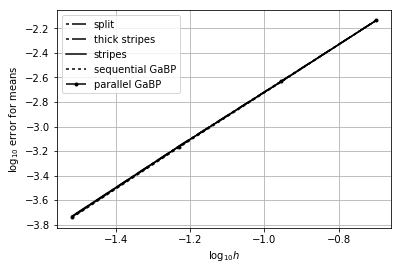

In [12]:
plt.plot(np.log10(N), np.log10(split_it), dashes=[2, 2, 10, 2], color='black', label=f'split')
plt.plot(np.log10(N), np.log10(thick_it), dashes=[2, 2, 10, 2], color='black', label=f'thick stripes')
plt.plot(np.log10(N), np.log10(stripes_it), color='black', label=f'stripes')
plt.plot(np.log10(N), np.log10(BP_it), dashes=[2, 2, 2, 2], color='black', label=f'sequential GaBP')
plt.plot(np.log10(N), np.log10(BP_it_p), '.', dashes=[2, 0, 2, 0], color='black', label=f'parallel GaBP')
plt.legend()
plt.grid(1)
plt.ylabel('$\\log_{10}$ error for means')
plt.xlabel('$\\log_{10} h$');
plt.savefig('means_convergence_grid.eps', format='eps', pad_inches=0.01)

**Convergence rate**

Consider the operator

\begin{equation}
A = e^{2(x-y)}\partial_x^2 + e^{2(y-x)}\partial_y^2 + \alpha\cos(\pi(x+y))\partial_x
\end{equation}

\begin{equation}
u = \sin(2 \pi x)\sin(\pi y)
\end{equation}

Code below computes

\begin{equation}
\left\|[A]_{\text{grid}}[u]_{\text{grid}} - [Au]_{\text{grid}}\right\|_{\infty}
\end{equation}

where by grid we mean the finite difference discretization and the projection on the uniform grid.

In [13]:
eq = lambda L_x, L_y: equations.equation_1(L_x, L_y, 0)

In [14]:
J = 5
h = 1/(1 + 2**J)
A, b, exact = equations.construct_matrix(eq, 'Dirichlet', 1, 1, 2**J, 2**J)
A = A.toarray()

s1, E = solvers.split_BP_solver(A, b, tol=h**2, write=True)
s2, EE = solvers.stripes_BP_solver(A, b, h**2, write=True)
s3, EEE = solvers.thick_stripes_BP_solver(A, b, h**2, write=True)
s4, EEEE = solvers.GaBP(A, b, tol=h**2, write=True)
s7, EEEEEEE = solvers.GaBP(A, b, tol=h**2, type='Parallel', write=True)
s5, EEEEE = solvers.GS(A, b, tol=h**2, write=True)
s6, EEEEEE = solvers.BICGSTAB(A, b, write=True)

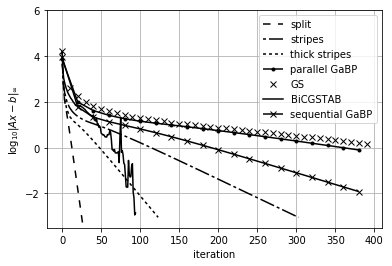

In [15]:
fig, ax = plt.subplots()
plt.plot(np.log10(E), dashes=[5, 5, 5, 5], color='black', label=f'split')
plt.plot(np.log10(EE), dashes=[2, 2, 10, 2], color='black', label=f'stripes')
plt.plot(np.log10(EEE), dashes=[2, 2, 2, 2], color='black', label=f'thick stripes')
plt.plot(np.arange(400)[::20], np.log10(EEEEEEE)[:400][::20], '.', dashes=[10, 0, 10, 0], color='black', label=f'parallel GaBP')
plt.plot(np.arange(400)[::10], np.log10(EEEEE)[:400][::10], 'x', color='black', label=f'GS')
plt.plot(np.log10(EEEEEE)[(np.log10(EEEEEE)>np.log10(h**2))], color='black', label=f'BiCGSTAB')
plt.plot(np.arange(400)[::20], np.log10(EEEE)[:400][::20], 'x', dashes=[10, 0, 10, 0], color='black', label=f'sequential GaBP')
plt.legend()
plt.grid(1)
ax.set_ylim(-3.5, 6)
plt.ylabel('$\\log_{10}\\left\\|Ax - b\\right\\|_{\\infty}$')
plt.xlabel('iteration');
plt.savefig('convergence_alpha_zero.eps', format='eps', pad_inches=0.01)

In [16]:
np.where(np.array(EEEEE)>1e-3)[0][-1]

1134

In [17]:
np.where(np.array(EEEE)>1e-3)[0][-1]

485

In [18]:
eq = lambda L_x, L_y: equations.equation_1(L_x, L_y, 50)

In [19]:
J = 5
h = 1/(1 + 2**J)
A, b, exact = equations.construct_matrix(eq, 'Dirichlet', 1, 1, 2**J, 2**J)
A = A.toarray()

s1, E = solvers.split_BP_solver(A, b, tol=h**2, write=True)
s2, EE = solvers.stripes_BP_solver(A, b, h**2, write=True)
s3, EEE = solvers.thick_stripes_BP_solver(A, b, h**2, write=True)
s4, EEEE = solvers.GaBP(A, b, tol=h**2, write=True)
s7, EEEEEEE = solvers.GaBP(A, b, tol=h**2, type='Parallel', write=True)
s5, EEEEE = solvers.GS(A, b, tol=h**2, write=True)
s6, EEEEEE = solvers.BICGSTAB(A, b, write=True)

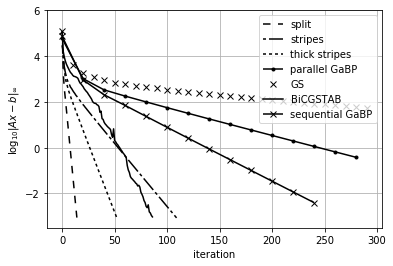

In [20]:
fig, ax = plt.subplots()
plt.plot(np.log10(E), dashes=[5, 5, 5, 5], color='black', label=f'split')
plt.plot(np.log10(EE), dashes=[2, 2, 10, 2], color='black', label=f'stripes')
plt.plot(np.log10(EEE), dashes=[2, 2, 2, 2], color='black', label=f'thick stripes')
plt.plot(np.arange(300)[::20], np.log10(EEEEEEE)[:300][::20], '.', dashes=[10, 0, 10, 0], color='black', label=f'parallel GaBP')
plt.plot(np.arange(300)[::10], np.log10(EEEEE)[:300][::10], 'x', color='black', label=f'GS')
plt.plot(np.log10(EEEEEE)[(np.log10(EEEEEE)>np.log10(h**2))], color='black', label=f'BiCGSTAB')
plt.plot(np.arange(250)[::20], np.log10(EEEE)[:250][::20], 'x', dashes=[10, 0, 10, 0], color='black', label=f'sequential GaBP')
plt.legend(loc=1)
plt.grid(1)
ax.set_ylim(-3.5, 6)
plt.ylabel('$\\log_{10}\\left\\|Ax - b\\right\\|_{\\infty}$')
plt.xlabel('iteration');
plt.savefig('convergence_alpha_50.eps', format='eps', pad_inches=0.01)

In [21]:
np.where(np.array(EEEEE)>1e-3)[0][-1]

1497

In [22]:
np.where(np.array(EEEE)>1e-3)[0][-1]

265